In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('/Users/jeronimoperezrocha/Library/Containers/com.microsoft.Excel/Data/Downloads/retail_sales_data.csv') #getting the data from the CSV file

In [3]:
sales #print the data

,Store_ID,Product_Category,Sales_Amount,Customer_Rating,Date_of_Sale
0,105,Clothing,NaN,3.0,2023-02-12
1,100,NaN,472.69,5.0,2023-01-28
2,103,Electronics,292.95,2.0,2023-02-08
3,103,Home & Kitchen,128.71,NaN,2023-01-10
4,107,Home & Kitchen,374.29,NaN,2023-02-28
...,...,...,...,...,...
2695,109,Electronics,407.65,3.0,2023-02-17
2696,105,Home & Kitchen,414.94,2.0,2023-03-03
2697,108,Home & Kitchen,126.26,3.0,2023-01-12
2698,107,Electronics,100.63,3.0,2023-02-02


## Data Cleaning

In [4]:
sales.isnull().sum() #find missing values in the data 

Store_ID              0
Product_Category    270
Sales_Amount        270
Customer_Rating     270
Date_of_Sale          0
dtype: int64

In [5]:
#Handeling Missing values 
Sales_Amount = SimpleImputer(strategy='median') #For Sales Amount missing values I'm using the median to fill the missing values
sales[['Sales_Amount']] = Sales_Amount.fit_transform(sales[['Sales_Amount']])

In [6]:
#Now for Customer Rating, I will be using with the average rating
Customer_Rating = SimpleImputer(strategy='mean') #for missing values in Customer values I'm using the mean of the customer ratings
sales[['Customer_Rating']] = Customer_Rating.fit_transform(sales[['Customer_Rating']])

In [7]:
#for product category I'm going to label it as "Unknown"
sales[['Product_Category']] = sales[['Product_Category']].fillna('Unknown')

In [8]:
sales.isnull().sum()

Store_ID            0
Product_Category    0
Sales_Amount        0
Customer_Rating     0
Date_of_Sale        0
dtype: int64

## Data Visualization

<Axes: >

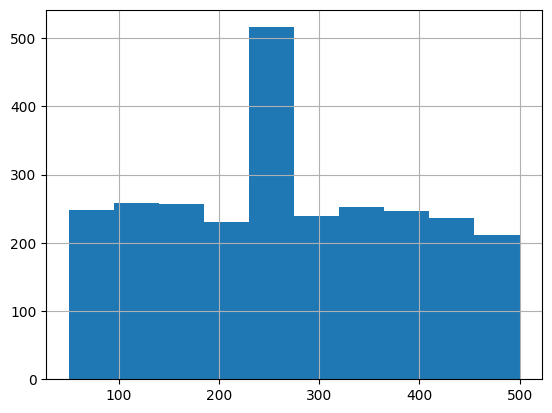

In [9]:
sales['Sales_Amount'].hist() #plotting the histogram for the sales amount

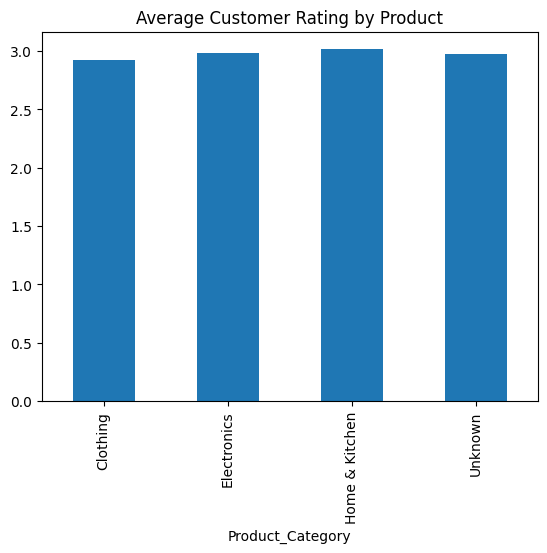

In [10]:
# Bar chart showing the average customer rating for each product
mean_ratings = sales.groupby('Product_Category')['Customer_Rating'].mean()
mean_ratings.plot(kind = 'bar')
plt.title('Average Customer Rating by Product')
plt.show()

## Data Manipulation

In [11]:
#Calculate the total sales amount for each product category
total_sales_amount = sales.groupby('Product_Category')['Sales_Amount'].sum()
print(total_sales_amount)

Product_Category
Clothing          212448.275
Electronics       227955.835
Home & Kitchen    213044.005
Unknown            77753.195
Name: Sales_Amount, dtype: float64


In [12]:
#Sort the product categories based on the total sales amount in descending order
total_sales_amount.sort_values(ascending=False)

Product_Category
Electronics       227955.835
Home & Kitchen    213044.005
Clothing          212448.275
Unknown            77753.195
Name: Sales_Amount, dtype: float64

In [13]:
#Rank the stores based on the total sales amount highest to lowest and add this as a new column
stores_by_sales = sales.groupby('Store_ID')['Sales_Amount'].sum()
stores_by_sales.sort_values(ascending=False)
print(stores_by_sales)

Store_ID
100    71212.460
101    74068.865
102    70509.665
103    82937.875
104    70978.905
105    77255.785
106    70712.305
107    71708.745
108    68862.085
109    72954.620
Name: Sales_Amount, dtype: float64


In [14]:
#Create a new data frame that contains the total sales amount for each store
stores_by_sales = sales.groupby('Store_ID')['Sales_Amount'].sum()
stores_by_sales = stores_by_sales.reset_index()
stores_by_sales

,Store_ID,Sales_Amount
0,100,71212.460
1,101,74068.865
2,102,70509.665
3,103,82937.875
4,104,70978.905
5,105,77255.785
6,106,70712.305
7,107,71708.745
8,108,68862.085
9,109,72954.620
